## Data Practicum II

### Title of the project:  Google Stock Price Prediction

#### Submitted by - Hareesh Nair

In [1]:
# Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# sklearn packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# plotting
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')




### Data loading

* This data is collected from yahoo finance site: https://finance.yahoo.com/
* This includes all historical data for google stock availble from this website.
* The CSV files downloaded from yahoo contains columns like- Date, Open, High, Low, Close, Adj Close, and Volume. In this project we will make use of two columns - Date and Adj Close.


In [2]:
# Data loading
df = pd.read_csv('GOOG_Max.csv')


### EDA

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
3,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276


In [4]:
df.shape

(4456, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4456 entries, 0 to 4455
Data columns (total 7 columns):
Date         4456 non-null object
Open         4456 non-null float64
High         4456 non-null float64
Low          4456 non-null float64
Close        4456 non-null float64
Adj Close    4456 non-null float64
Volume       4456 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 243.8+ KB


In [6]:
df.isnull().sum().sort_values(ascending = False ).head(25)

Volume       0
Adj Close    0
Close        0
Low          0
High         0
Open         0
Date         0
dtype: int64

### Data Visualization

In [7]:
df.set_index('Date',inplace = True)# Set the date to be the index

In [8]:
# resorting the data
df.index =  pd.to_datetime(df.index,format='%Y-%m-%d')

In [9]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276


Text(0.5, 1.0, 'Google Stock at all time')

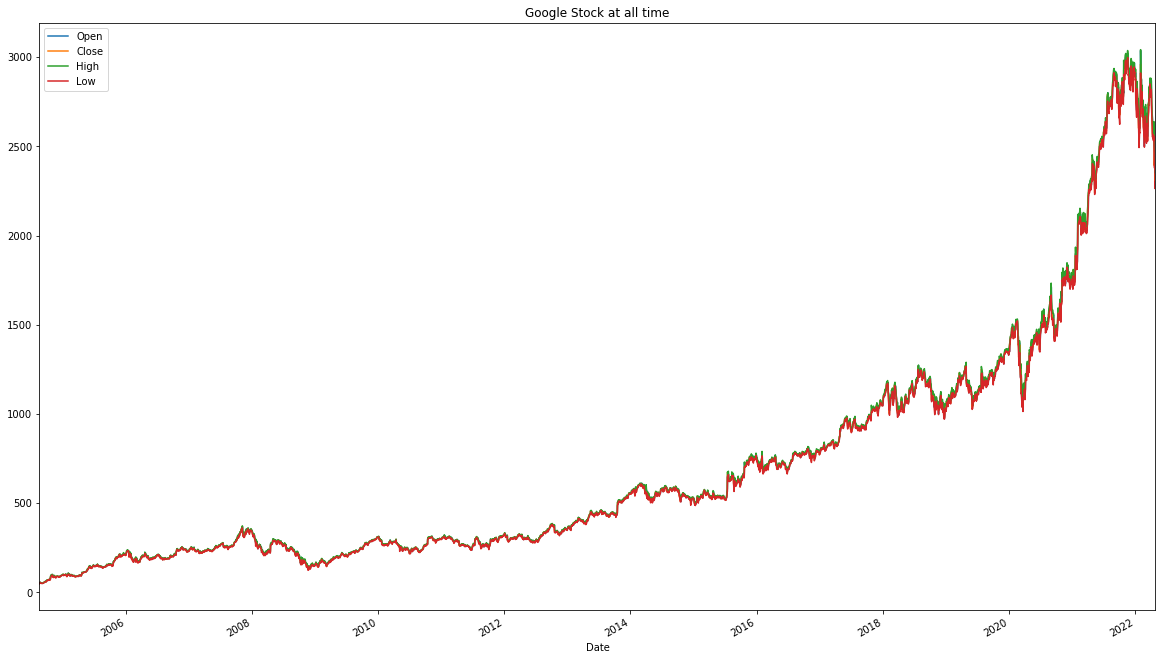

In [10]:
df[['Open','Close','High','Low']].plot(figsize = (20,12))
plt.title('Google Stock at all time')

Text(0, 0.5, 'Stock action')

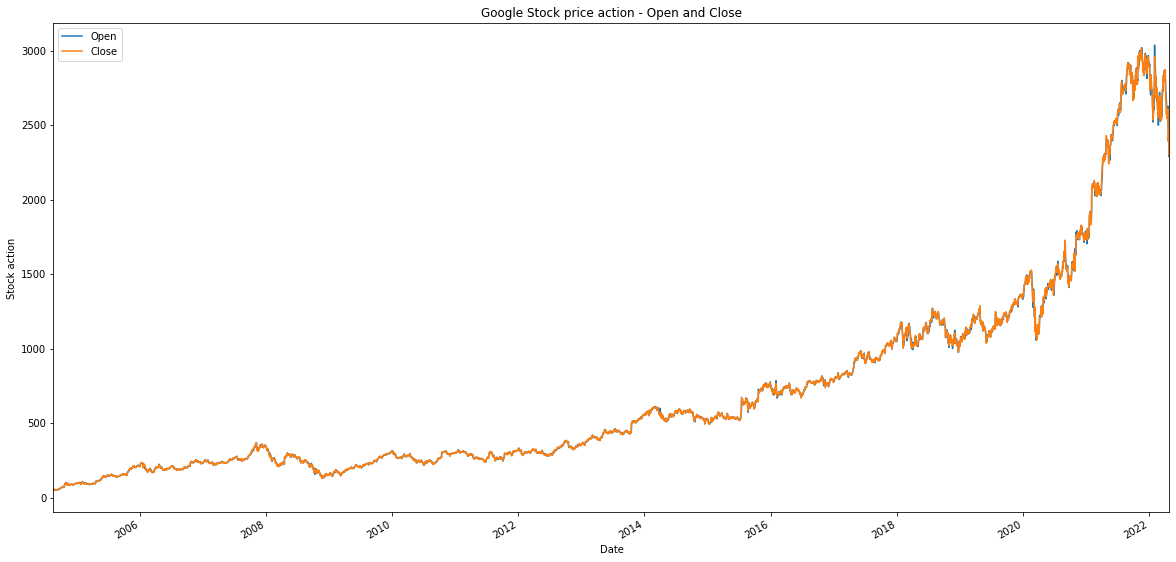

In [11]:
df[['Open','Close']].plot(figsize = (20,10), alpha = 1)
plt.title('Google Stock price action - Open and Close')
plt.xlabel('Date')
plt.ylabel('Stock action')

Text(0, 0.5, 'Stock action')

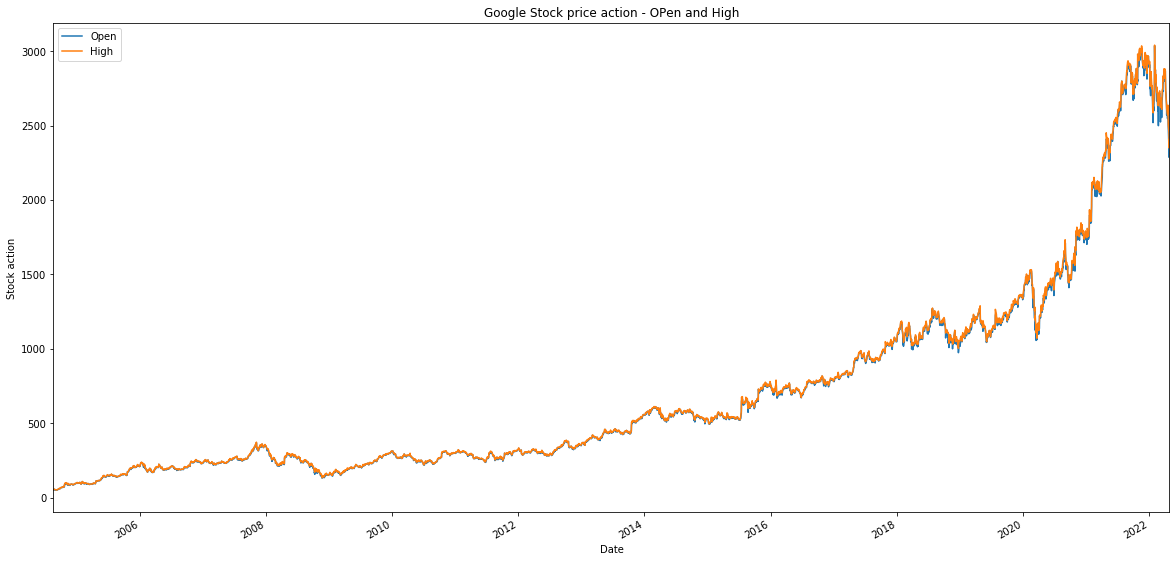

In [12]:
df[['Open','High']].plot(figsize = (20,10), alpha = 1)
plt.title('Google Stock price action - OPen and High')
plt.xlabel('Date')
plt.ylabel('Stock action')

Text(0, 0.5, 'Stock action')

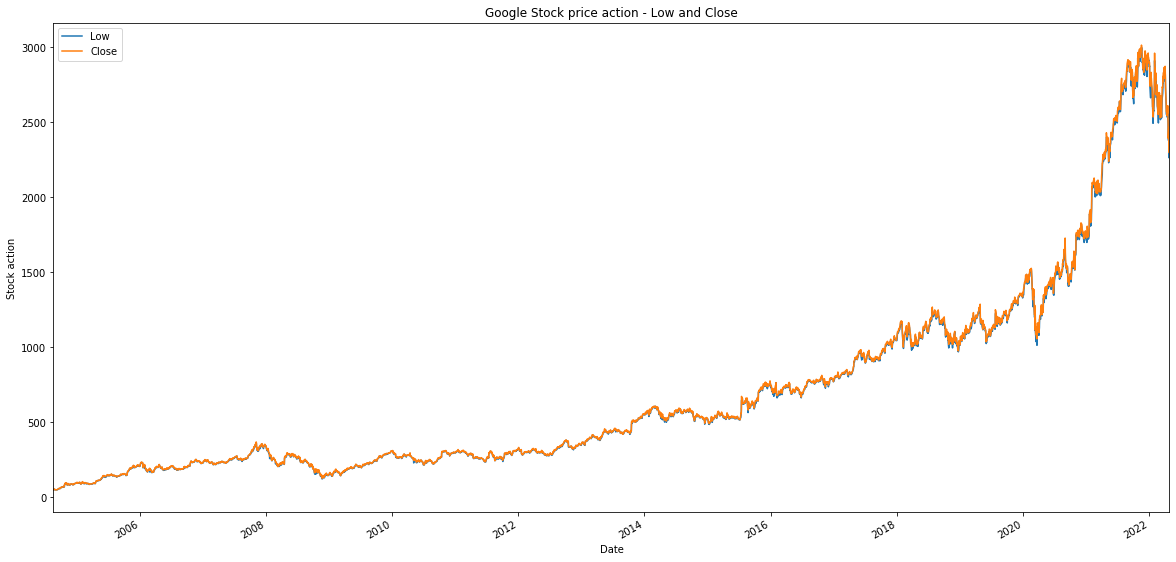

In [13]:
df[['Low','Close']].plot(figsize = (20,10), alpha = 1)
plt.title('Google Stock price action - Low and Close')
plt.xlabel('Date')
plt.ylabel('Stock action')

Text(0, 0.5, 'Stock action')

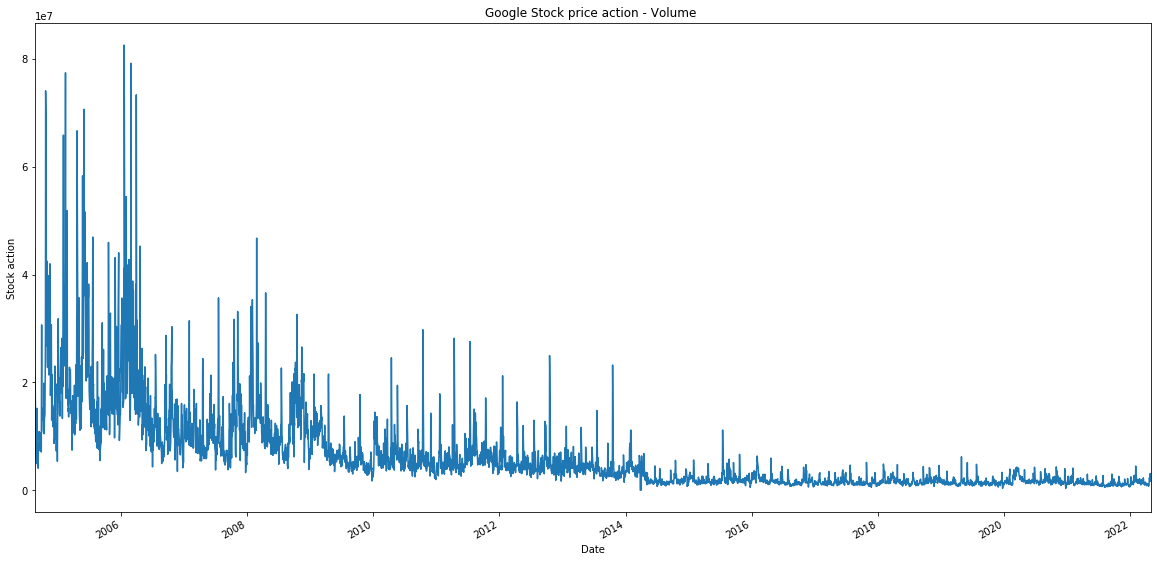

In [14]:
df['Volume'].plot(figsize = (20,10), alpha = 1)
plt.title('Google Stock price action - Volume ')
plt.xlabel('Date')
plt.ylabel('Stock action')

Text(0, 0.5, 'Stock action')

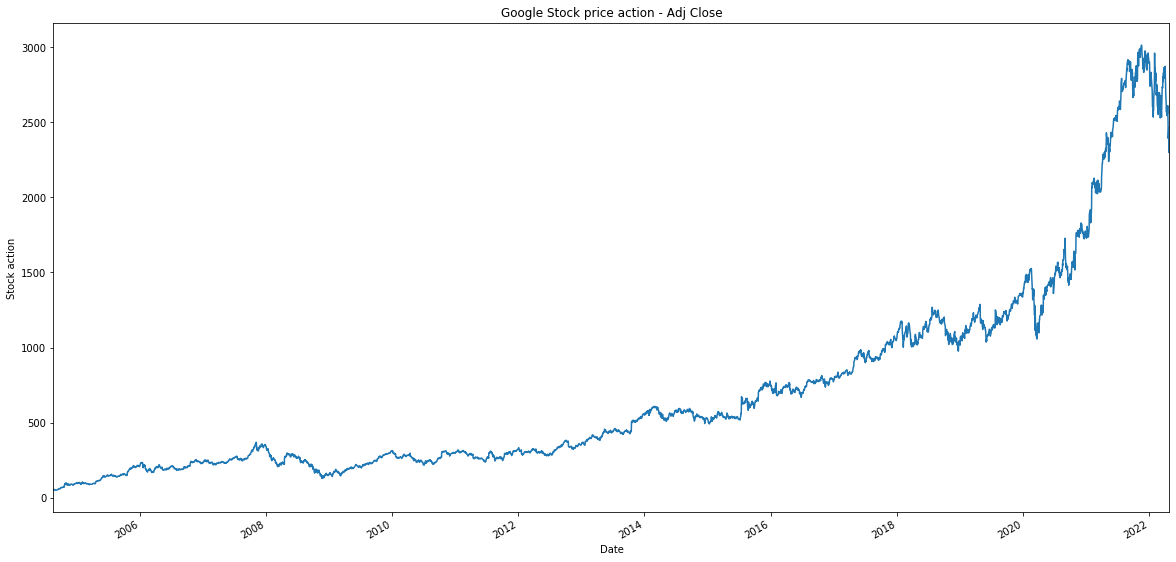

In [15]:
df['Adj Close'].plot(figsize = (20,10), alpha = 1)
plt.title('Google Stock price action - Adj Close')
plt.xlabel('Date')
plt.ylabel('Stock action')

#### Visulaization Analysis
* From the previous visualization results the data prior to 2010 is not very significant, so adjusting data set from 2010

Text(0, 0.5, 'Stock action')

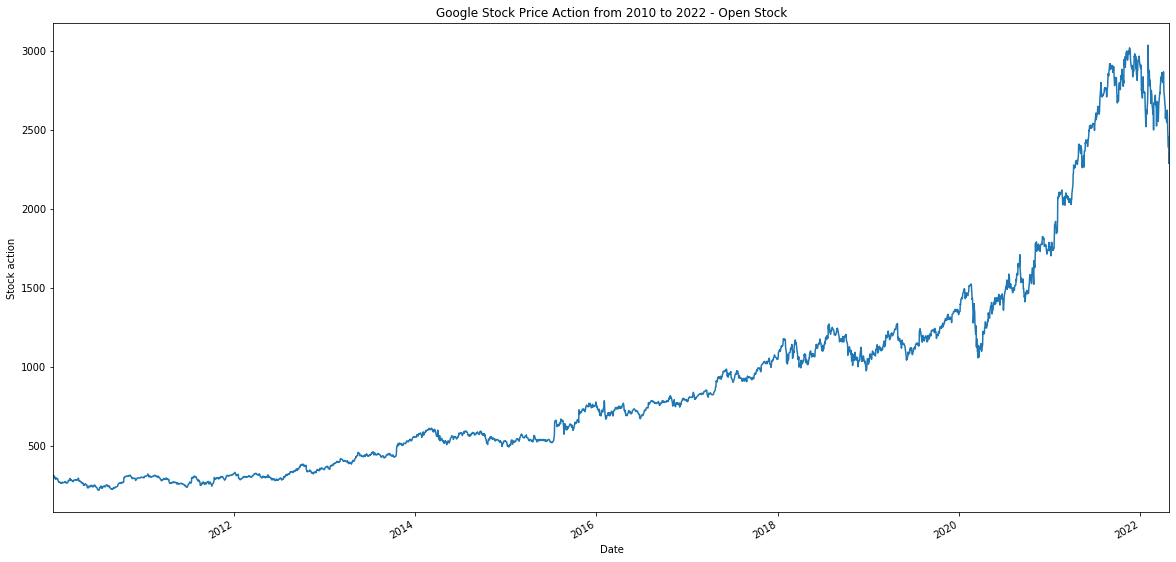

In [16]:
Goog_df = df['2010':'2023']

Goog_df['Open'].plot(figsize = (20,10), alpha = 1)
plt.title('Google Stock Price Action from 2010 to 2022 - Open Stock')
plt.xlabel('Date')
plt.ylabel('Stock action')

Text(0.5, 1.0, 'Google Stock Price Action from 2010 to 2022 - Open to High')

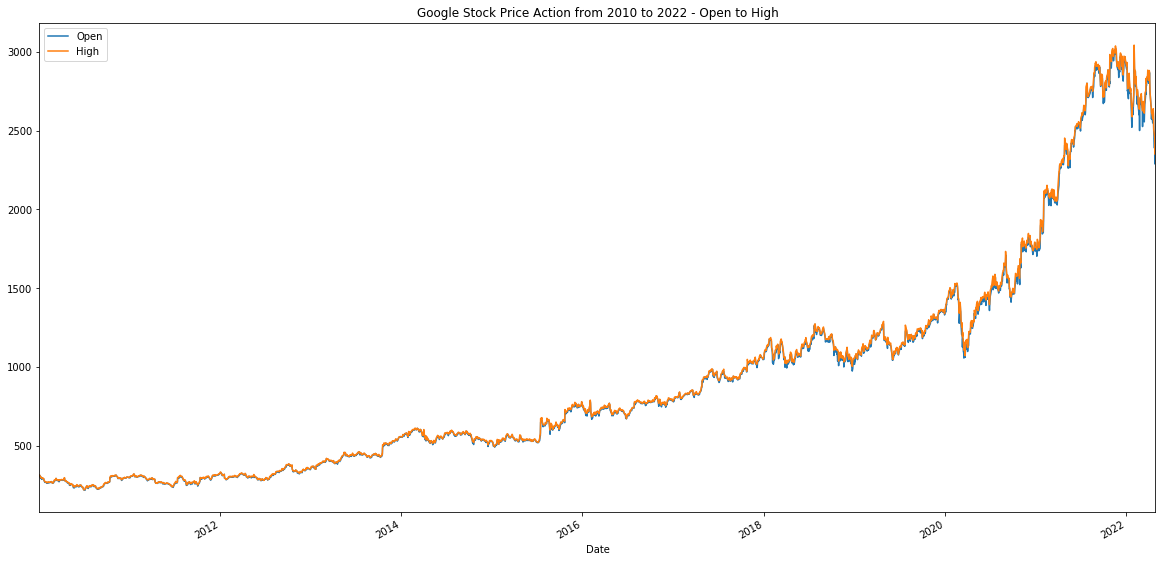

In [17]:
Goog_df[['Open','High']].plot(figsize = (20,10), alpha = 1)
plt.title('Google Stock Price Action from 2010 to 2022 - Open to High')

Text(0.5, 1.0, 'Google Stock Price Action from 2010 to 2022 - Adj Close')

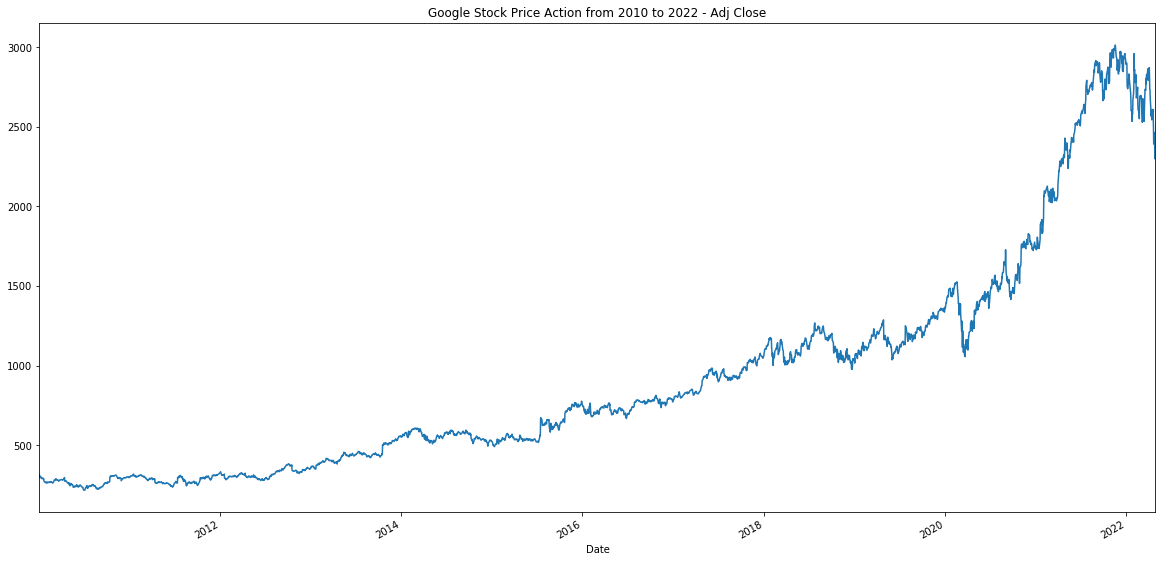

In [18]:
Goog_df['Adj Close'].plot(figsize = (20,10), alpha = 1)
plt.title('Google Stock Price Action from 2010 to 2022 - Adj Close')

Text(0.5, 1.0, 'Google Stock Price Action form 2010 to 2022 - Volume')

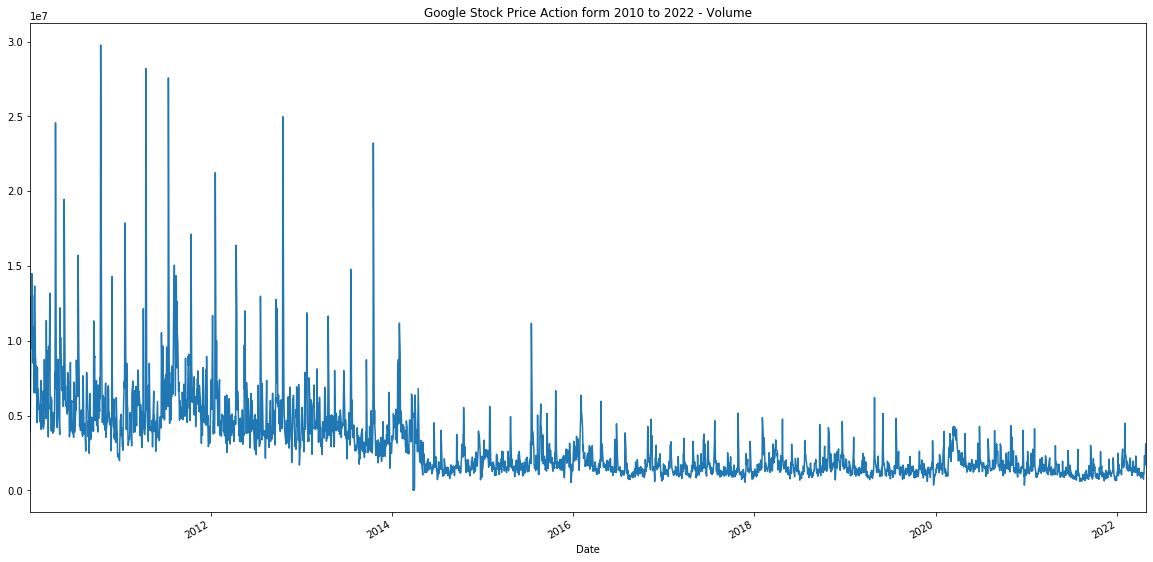

In [19]:
Goog_df['Volume'].plot(figsize = (20,10), alpha = 1)
plt.title('Google Stock Price Action form 2010 to 2022 - Volume')

In [20]:
Goog_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3103.000000,3103.000000,3103.000000,3103.000000,3103.000000,3.103000e+03
mean,917.582623,926.242117,908.792946,917.692801,917.692801,2.973830e+06
std,689.453930,696.492553,682.209435,689.323877,689.323877,2.571782e+06
min,218.336624,220.314209,216.005356,217.220810,217.220810,7.922000e+03
25%,380.561050,384.576004,378.057937,381.958328,381.958328,1.329800e+06
50%,722.710022,727.000000,716.429993,720.640015,720.640015,1.950700e+06
75%,1169.234985,1178.222473,1157.470032,1168.289978,1168.289978,4.029848e+06
max,3037.270020,3042.000000,2997.750000,3014.179932,3014.179932,2.976073e+07


### Augmented Dickey Fuller Test (ADF)
* ADF test is used to determine the presence of unit root in the series, and hence helps in understand if the series is stationary or not

In [21]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
   
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)


In [22]:
print(adf_test(df['High']))

Results of Dickey-Fuller Test:
Test Statistic                    1.736914
p-value                           0.998215
#Lags Used                       32.000000
Number of Observations Used    4423.000000
Critical Value (1%)              -3.431829
Critical Value (5%)              -2.862194
Critical Value (10%)             -2.567118
dtype: float64
None


In [23]:
print(adf_test(df['High'].resample('MS').mean()))

Results of Dickey-Fuller Test:
Test Statistic                   2.646962
p-value                          0.999082
#Lags Used                      14.000000
Number of Observations Used    198.000000
Critical Value (1%)             -3.463815
Critical Value (5%)             -2.876251
Critical Value (10%)            -2.574611
dtype: float64
None


Results of Dickey-Fuller Test:
Test Statistic                  -4.294551
p-value                          0.000454
#Lags Used                      12.000000
Number of Observations Used    134.000000
Critical Value (1%)             -3.480119
Critical Value (5%)             -2.883362
Critical Value (10%)            -2.578407
dtype: float64
None


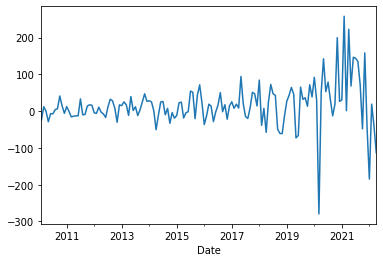

In [24]:
Goog_df_diff = Goog_df['Open'].resample('MS').mean() - Goog_df['Open'].resample('MS').mean().shift(1)
Goog_df_open_diff = Goog_df_diff.dropna()
Goog_df_open_diff.plot()


print(adf_test(Goog_df_open_diff))

### Kwiatkowski-Phillips-Schmidt-Shin Test (KPSS)
* Test for checking the stationarity of a time series

In [25]:
from statsmodels.tsa.stattools import kpss


def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

In [26]:
kpss_test(Goog_df['High'])

Results of KPSS Test:
Test Statistic            8.23516
p-value                   0.01000
Lags Used                29.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64


#### From both the tests it is evident the data set is a timeseries , so further using LSTM and RNN for Modelling.

### Google Stock Price Predication Using LSTM and RNN

### Data Preprocessing

In [27]:
train_Goog = Goog_df['High'].iloc[:-4]

# Take ramdom  6 variables 

X_train=[]
y_train=[]

for i in range(2, len(train_Goog)):
    X_train.append(train_Goog[i-2:i])
    y_train.append(train_Goog[i])

In [28]:
import math
train_len = math.ceil(len(train_Goog)*0.8)
train_len

2480

In [29]:
# For Model and apply RNN + LSTM
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, TimeDistributed 

In [30]:
X_train, y_train= np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [31]:
model=Sequential()
model.add(LSTM(50,activation='relu', input_shape=(X_train.shape[1],1)))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
model.fit(X_train, y_train, epochs=10, batch_size=100, verbose=2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dense (Dense)                (None, 25)                1275      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 11,701
Trainable params: 11,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
31/31 - 1s - loss: 1054273.2500
Epoch 2/10
31/31 - 0s - loss: 106876.4844
Epoch 3/10
31/31 - 0s - loss: 3687.8650
Epoch 4/10
31/31 - 0s - loss: 479.7889
Epoch 5/10
31/31 - 0s - loss: 393.6504
Epoch 6/10
31/31 - 0s - loss: 395.8512
Epoch 7/10
31/31 - 0s - loss: 391.1451
Epoch 8/10
31/31 - 0s - loss: 390.4507
Epoch 9/10
31/31 - 0s - loss: 394.8214
Epoch 10/10
31/31 - 0s 

#### plot loss

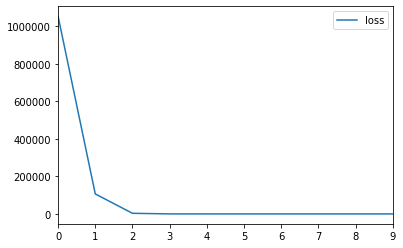

In [32]:
losse = pd.DataFrame(model.history.history)
losse[['loss']].plot()

* Result is showing the Curve which shows the loss is normal and no anomalies.

In [33]:
test_data = train_Goog[train_len-2:]
X_val=[]
Y_val=[] 

for i in range(2, len(test_data)):
    X_val.append(test_data[i-2:i])
    Y_val.append(test_data[i])

In [34]:
X_val, Y_val = np.array(X_val), np.array(Y_val)
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1],1))
prediction = model.predict(X_val)

#### Check the model error accuracy and model accuracy 

In [35]:
from sklearn.metrics import mean_squared_error


lstm_train_pred = model.predict(X_train)
lstm_valid_pred = model.predict(X_val)
print('Train rmse:', np.sqrt(mean_squared_error(y_train, lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)))

Train rmse: 19.76645689934707
Validation rmse: 38.425388465051554


#### Check Validation vs Prediction

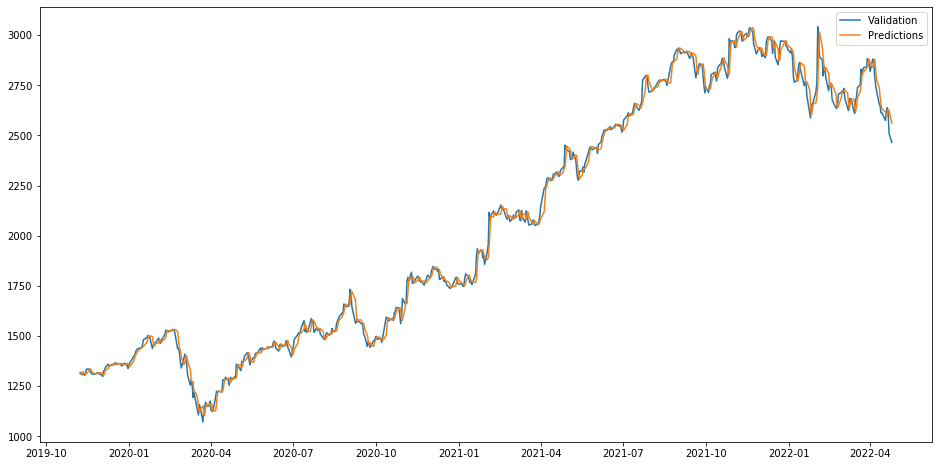

In [36]:
valid = pd.DataFrame(train_Goog[train_len:])
valid['Predictions']=lstm_valid_pred 
plt.figure(figsize=(16,8))
plt.plot(valid[['High','Predictions']])
plt.legend(['Validation','Predictions'])
plt.show()

#### data frame to Check the percentage of error between real and predicted

In [37]:


variance = []
for i in range(len(valid)):
  
  variance.append(valid['High'][i]-valid['Predictions'][i])
variance = pd.DataFrame(variance)
variance.describe()

,0
count,619.000000
mean,0.739819
std,38.449336
min,-124.370117
25%,-15.789856
50%,1.412110
75%,20.517456
max,299.115479


#### LSTM Prediction

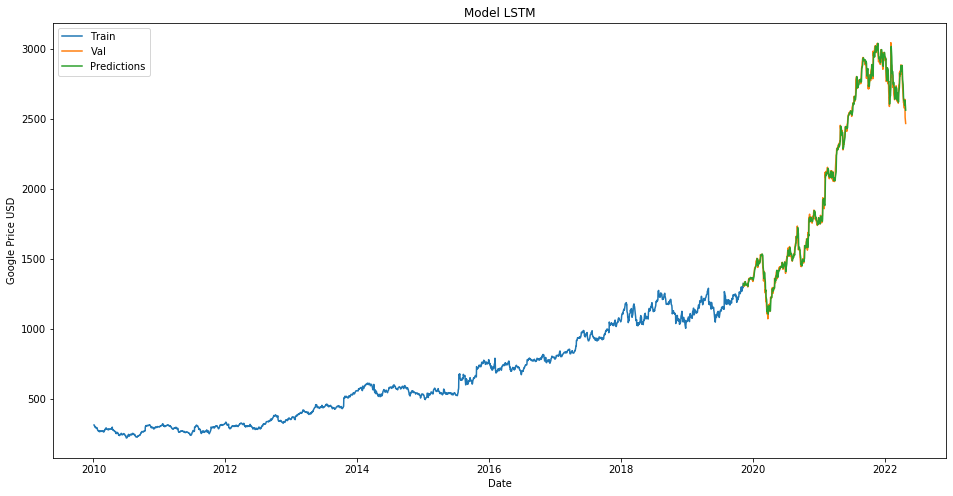

In [38]:
train = train_Goog[:train_len]
valid = pd.DataFrame(train_Goog[train_len:])
valid['Predictions']=lstm_valid_pred

plt.figure(figsize=(16,8))
plt.title('Model LSTM')
plt.xlabel('Date')
plt.ylabel('Google Price USD')
plt.plot(train)
plt.plot(valid[['High','Predictions']])
plt.legend(['Train','Val','Predictions'])
plt.show()

## Conclusion

* From RNN and LSTM method the plot looks almost similar to the validation results.
* This model can be further improved and can be used to predict the Google stock price results.
* On Further tuning with other data sets this model can be reused for other stock price predictions also.


### References
* Data - https://finance.yahoo.com/
* https://learning.oreilly.com/library/view/python-for-finance/9781492024323/ch15.html#ts_clustering
* Code Refernces - https://www.kaggle.com/search?q=google+stock+price+in%3Anotebooks
